In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table measurement 
measurement = Base.classes.measurement
station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23')

twelve_months ('2017-08-23',)
 one year from the last date in data set 2016-08-23


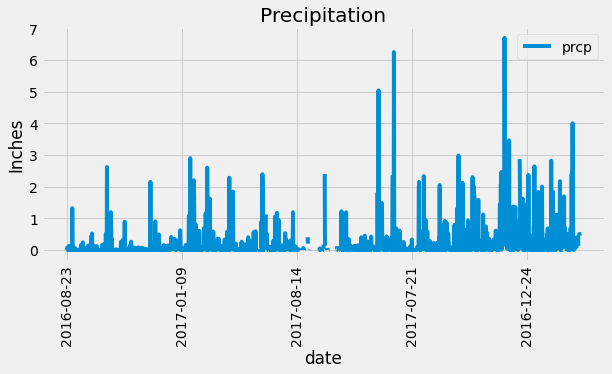

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

twelve_months = session.query(measurement.date).order_by(measurement.date.desc()).first()
print('twelve_months {}'.format(twelve_months))

# Calculate the date one year from the last date in data set.

one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(' one year from the last date in data set {}'.format(one_year_ago))

# Perform a query to retrieve the data and precipitation scores
query_df = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date >= '2016-08-23').all()
query_df

# Save the query results as a Pandas DataFrame and set the index to the date column

index_data = pd.DataFrame(query_df)
index_data = index_data.set_index("date")
index_data.head()

# Sort the dataframe by date

sort_data = index_data.sort_values(by = "date")
sort_data.head()

# Use Pandas Plotting with Matplotlib to plot the data

index_data.plot(figsize=(9,4))
plt.xticks(rotation='vertical')
plt.ylabel('Inches')
plt.title('Precipitation')
plt.savefig("Images/precipitation1.png")
plt.show()


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
stationcount = session.query(station.station).count()
print(stationcount)

9


In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = session.query(measurement.station, func.count(measurement.station), measurement.prcp).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc()).all()
active

[('USC00519281', 2772, 0.15),
 ('USC00519397', 2724, 0.08),
 ('USC00513117', 2709, 0.28),
 ('USC00519523', 2669, 0.15),
 ('USC00516128', 2612, 0.14),
 ('USC00514830', 2202, 0.01),
 ('USC00511918', 1979, 0.05),
 ('USC00517948', 1372, None),
 ('USC00518838', 511, 0.21)]

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
            filter(measurement.station=='USC00519281').all()

print(temps)

temperature_data = session.query(func.min(measurement.tobs),
func.max(measurement.tobs),
func.avg(measurement.tobs)).filter(measurement.station==active_stations[0][0]).all() 
print('Lowest temperature: {}.\nHighest temperature: {}\nAverage temperature: {}'.\
format(temperature_data[0][0],temperature_data[0][1],round(temperature_data[0][2],2)))

[('USC00519281', 54.0, 85.0, 71.66378066378067)]
Lowest temperature: 54.0.
Highest temperature: 85.0
Average temperature: 71.66


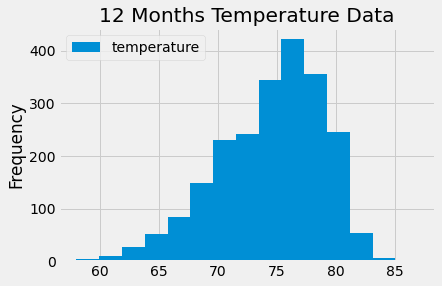

In [31]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_stations_df = session.query(measurement.station,func.count(measurement.tobs)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).first() 
active_stations_df=active_stations_df[0]

temp_observation = session.query(measurement.tobs).filter(measurement.date>=one_year_ago)
temp_observation = pd.DataFrame(temp_observation,columns=['temperature'])

temp_observation.plot.hist(bins=15,title='12 Months Temperature Data') 
plt.savefig("Images/Station-Histogram1.png") 
plt.show()

# Close session

In [32]:
# Close Session
session.close()